In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 72

DIPlib -- a quantitative image analysis library
Version 3.5.1 (Jul  5 2024)
For more information see https://diplib.org


In [2]:
a = dip.Image((20, 10), 1)  # 20 * 10 的图像，每个像素值为1，而不是rgb三位数
a.Fill(3)

In [3]:
b = a[4 : -1, 0 : 4] # 第一个参数是行，第二个参数是列 b是a的一个视图 两者共享数据
b.Fill(55)
a[:10, :3] = 100
a[10:15, 5:7] = 200

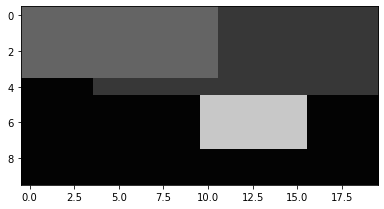

In [4]:
a.Show('normal')

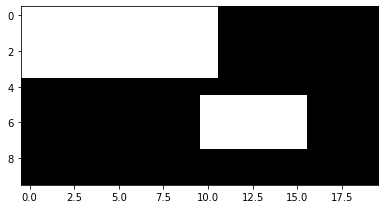

In [5]:
m = a >= 100
m.Show()

In [6]:
print(m)

2D Scalar image:
    data type:      BIN
    sizes:          {20, 10}
    strides:        {1, 20}, tensor stride 1
    data pointer:   0000023FDA125030 (shared among 1 images)
    origin pointer: 0000023FDA125030



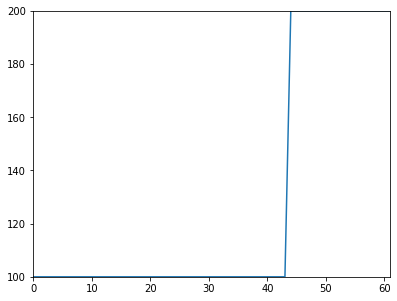

In [7]:
a[m].Show('normal') # a[m] 类似是一个索引

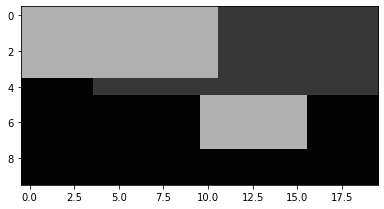

In [8]:
a[m] = 176
a.Show('normal')

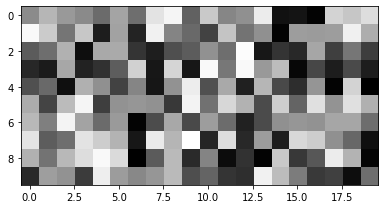

In [9]:
# 使用Numpy数组，要注意之前的dip.Image第一个参数是x也就是宽度，第二个参数是y也就是高度
# Numpy 第一个参数是高度，第二个参数是宽度
np.random.seed(0)
b = np.random.rand(a.Size(1), a.Size(0))
dip.Show(b)

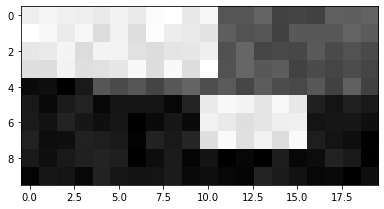

In [10]:
a += 30 * b
a.Show()

In [11]:
print(np.mean(a))
print(dip.Mean(a)[0][0])
print(dip.Mean(b)[0][0])

85.16313
85.16315460205078
0.50043779790514


## 从文件读取图像

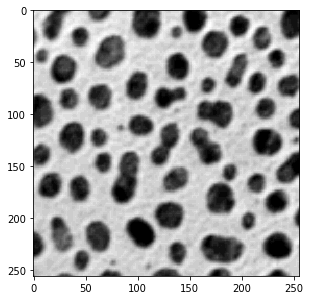

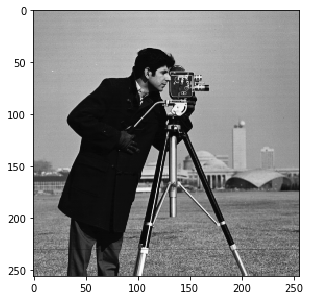

In [12]:
a = dip.ImageRead('E:\JKZ_programs\shanneng\diplib-notebooks\cermet.ics')
a.Show()
b = dip.Image(plt.imread('E:\JKZ_programs\shanneng\diplib-notebooks\cameraman.tif'))
b.Show('normal')

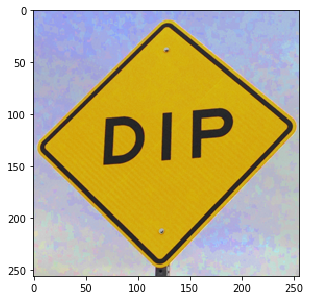

In [13]:
a = dip.ImageRead('E:\JKZ_programs\shanneng\diplib-notebooks\DIP.tif')
a.Show()

In [14]:
print(a)
print(a[50:100, :]) # 从第50行到第100行，所有列
print(a(0)) # 取第0个通道 red
print(a[128, 45])   # 取第128行第45列的像素值 是一个list 有三个通道的值
print(a[128, 45][0])    # 取第128行第45列的像素值的第一个通道red的值
print(a(0)[128, 45])    # 取第一个通道red的第128行第45列的像素值的值

2D Color image (3x1 column vector, 3 elements, sRGB):
    data type:      UINT8
    sizes:          {256, 256}
    strides:        {3, 768}, tensor stride 1
    data pointer:   0000023FE4BEE490 (shared among 1 images)
    origin pointer: 0000023FE4BEE490

2D Color image (3x1 column vector, 3 elements, sRGB):
    data type:      UINT8
    sizes:          {51, 256}
    strides:        {3, 768}, tensor stride 1
    data pointer:   0000023FE4BEE490 (shared among 2 images)
    origin pointer: 0000023FE4BEE526

2D Scalar image:
    data type:      UINT8
    sizes:          {256, 256}
    strides:        {3, 768}, tensor stride 1
    data pointer:   0000023FE4BEE490 (shared among 2 images)
    origin pointer: 0000023FE4BEE490

[210, 177, 18]
210
[210]


sRGB


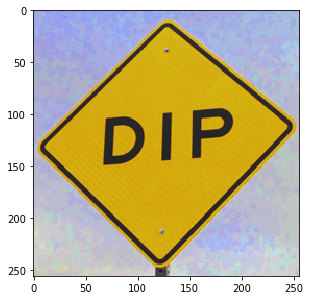

Lab


In [15]:
print(a.ColorSpace())
b = dip.ColorSpaceManager.Convert(a, 'Lab')
b.Show()
print(b.ColorSpace())

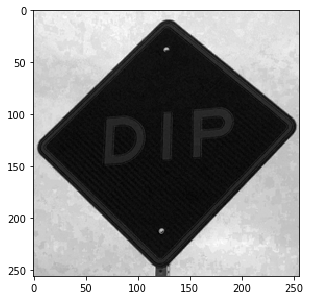

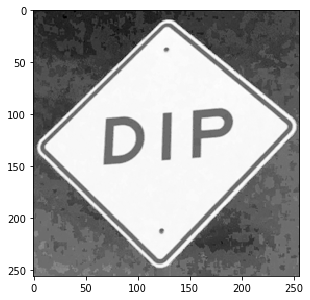

In [16]:
a(2).Show()
b(2).Show()

## 滤波

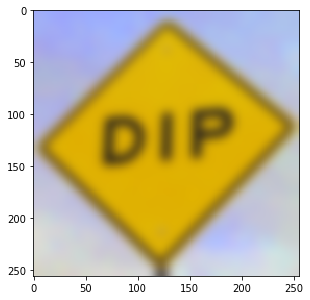

In [17]:
b = dip.Gauss(a, 5)
b.Show()

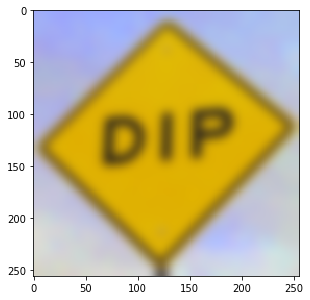

In [18]:
# 上述代码和下面的代码是等价的
b = dip.Image()
dip.Gauss(a, out = b, sigmas = 5)
b.Show()

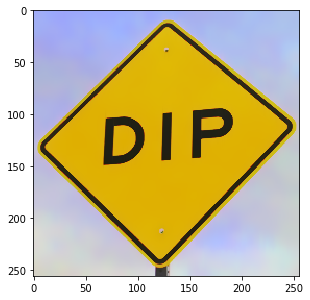

In [19]:
b = dip.BilateralFilter(a, spatialSigmas = 5, tonalSigma = 30)  # 双边滤波
b.Show()

### 转换灰度

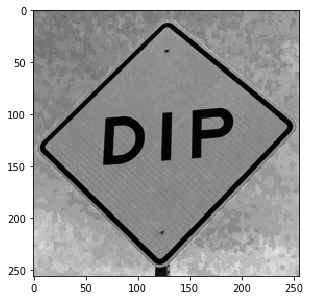

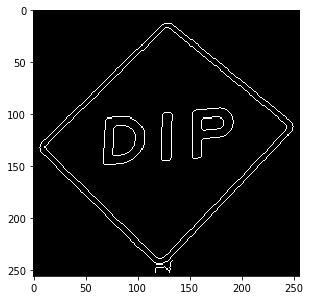

In [20]:
# 使用滤波器将彩色图像转换为灰度图像
b = dip.ColorSpaceManager.Convert(a, 'gray')
b.Show()
dip.Canny(b, upper=0.99).Show()

## 测量

{1 um}


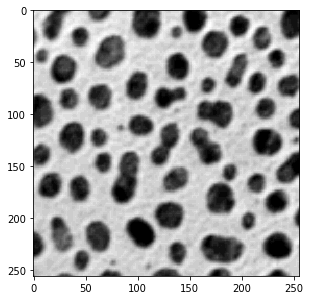

In [21]:
a = dip.ImageReadICS('E:\JKZ_programs\shanneng\diplib-notebooks\cermet.ics')
a.SetPixelSize(1, 'um')
print(a.PixelSize())
a.Show()

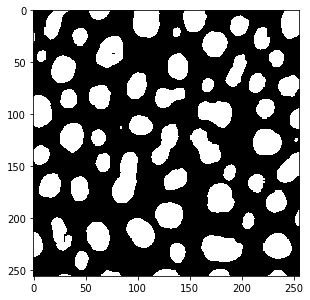

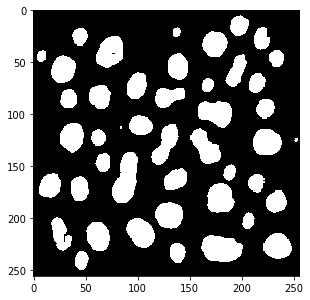

   |       Size |   Solidity |                                            Statistics | ConvexArea | 
-- | ---------- | ---------- | ----------------------------------------------------- | ---------- | 
   |            |            |       Mean |     StdDev |   Skewness | ExcessKurtosis |            | 
   |     (um^2) |            |            |            |            |                |     (um^2) | 
-- | ---------- | ---------- | ---------- | ---------- | ---------- | -------------- | ---------- | 
 1 |      262.0 |     0.9668 |      45.34 |      30.82 |     0.7216 |        -0.6831 |      271.0 | 
 2 |      63.00 |     0.9474 |      86.35 |      13.41 |     0.2313 |        -0.5471 |      66.50 | 
 3 |      243.0 |     0.9293 |      75.09 |      21.16 |     0.1711 |        -0.9723 |      261.5 | 
 4 |      209.0 |     0.9698 |      61.63 |      25.80 |     0.3937 |        -0.7994 |      215.5 | 
 5 |      462.0 |     0.9665 |      62.10 |      20.27 |     0.7329 |         0.1613 |     

In [22]:
b = a < 120
b.Show()
b = dip.EdgeObjectsRemove(b)    # 将与边界相连的对象去掉
b.Show()
b = dip.Label(b, minSize=30)    #会对二值图像 b 中的连通区域进行标记，并将每个独立的物体分配一个不同的标签。minSize=30 表示 仅保留面积大于等于 30 像素的物体
m = dip.MeasurementTool.Measure(b, a, ['Size', 'Solidity', 'Statistics'])   #会基于图像 b 中标记的对象，计算一些物理属性或几何特征。 这里计算了物体的面积、实体度和统计信息
print(m)

In [23]:
print(m['Statistics'][30])
print(m['Statistics'][30][2])
print(m[30]['Statistics'][2])

[51.05454545454547, 27.733471736251396, 0.6729066879016448, -0.5471176839610813]
0.6729066879016448
0.6729066879016448


In [24]:
# 省略其中一个索引，将返回完整的行或列
print(m[30])
print(m['Statistics'])

<MeasurementObject with 4 features for object 30>
<MeasurementFeature for feature Statistics and 43 objects>


In [25]:
# 可以被转化为np.array
print(np.asarray(m[30]))
print(np.asarray(m['Solidity']).transpose())

[[385.           0.96370463  51.05454545  27.73347174   0.67290669
   -0.54711768 399.5       ]]
[[0.96678967 0.94736842 0.9292543  0.96983759 0.9665272  0.97448166
  0.98159509 0.97619048 0.98356808 0.90410959 0.974      0.97455471
  0.97087379 0.97857143 0.96675192 0.90426759 0.97457627 0.96857671
  0.9245283  0.97567954 0.97470817 0.85802469 0.88888889 0.97175141
  0.97923875 0.92680242 0.96759259 0.95454545 0.9765625  0.96370463
  0.9612069  0.97335203 0.95268139 0.9738652  0.96964286 0.95145631
  0.9        0.97138047 0.971652   0.98130841 0.96340732 0.97495183
  0.97721519]]


2D Scalar image:
    data type:      DFLOAT
    sizes:          {256, 256}
    pixel size:     1 um x 1 um
    strides:        {1, 256}, tensor stride 1
    data pointer:   0000023FE4D99010 (shared among 1 images)
    origin pointer: 0000023FE4D99010



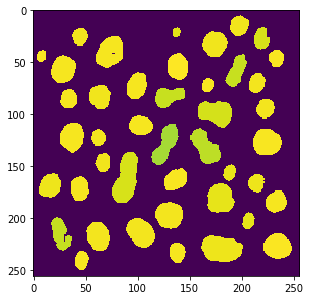

In [26]:
c = dip.ObjectToMeasurement(b, m['Solidity'])   # 对于图像b中的每个标记物体，将其对应的实体度值映射到物体上，得到一个新的图像c，该图像中的每个物体的像素值都是其实体度值
print(c)
c.Show(colormap='viridis')  # viridis 是一种颜色映射

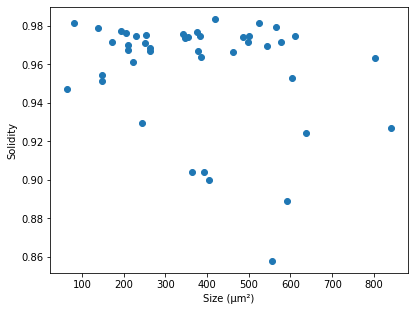

In [27]:
plt.scatter(np.asarray(m['Size']), np.asarray(m['Solidity']))
plt.xlabel('Size (μm²)')
plt.ylabel('Solidity');